In [ ]:
!gdown --id 1c6LDdUOeJX8pu9eSqAIVRfMl34Jn5sWE

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1c6LDdUOeJX8pu9eSqAIVRfMl34Jn5sWE
From (redirected): https://drive.google.com/uc?id=1c6LDdUOeJX8pu9eSqAIVRfMl34Jn5sWE&confirm=t&uuid=47b00cd6-efee-450c-8f25-48ef4dc1b90e
To: /content/haarcascade_frontalface_default.xml
100% 1.25M/1.25M [00:00<00:00, 127MB/s]


Earrings overlaid successfully!


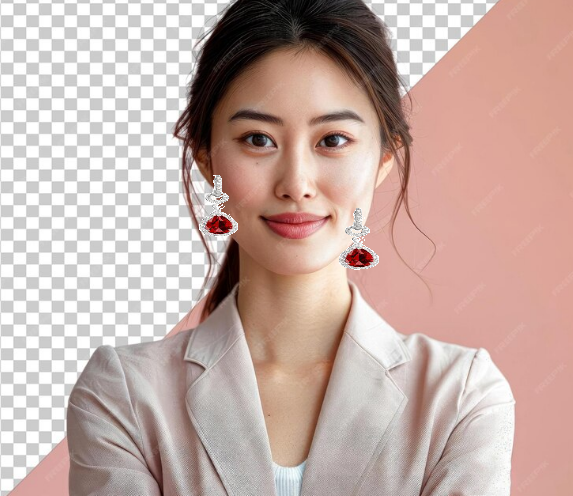

In [ ]:
 import cv2
from google.colab.patches import cv2_imshow

def resize_earrings(face_width, face_height, earring_image):
    earring_height = int(face_height * 0.3)
    earring_width = int(face_width * 0.3)
    resized_earring = cv2.resize(earring_image, (earring_width, earring_height))
    return resized_earring

# Load the input image (face) and the left and right earring images (with transparent backgrounds)
input_image = cv2.imread("/content/l4.png")  # Replace with your input face image
left_earring_image = cv2.imread("/content/leftear_1.png", cv2.IMREAD_UNCHANGED)  # Replace with your left earring image
right_earring_image = cv2.imread("/content/rightear_1.png", cv2.IMREAD_UNCHANGED)  # Replace with your right earring image

# Detect face using a pre-trained face detector (you can use Haar cascades or deep learning-based models)
# Extract the face region from the input image

# Example face detection (you can replace this with your own face detection code)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
faces = face_cascade.detectMultiScale(input_image, scaleFactor=1.1, minNeighbors=5)

if len(faces) > 0:
    x, y, w, h = faces[0]
    face_center_x = x + w // 2
    face_center_y = y + h // 2

    # Resize the left and right earring images to fit the face
    left_earring_resized = resize_earrings(w, h, left_earring_image)
    right_earring_resized = resize_earrings(w, h, right_earring_image)

    # Calculate positions for left and right earrings
    left_ear_x = face_center_x - int(w * 0.55)
    left_ear_y = y + int(h * 0.55)

    right_ear_x = face_center_x + int(w * 0.15)
    right_ear_y = y + int(h * 0.7)

    # Overlay the left earring
    for i in range(left_earring_resized.shape[0]):
        for j in range(left_earring_resized.shape[1]):
            if left_earring_resized[i, j, 3] != 0:
                input_image[left_ear_y + i, left_ear_x + j] = left_earring_resized[i, j, :3]

    # Overlay the right earring
    for i in range(right_earring_resized.shape[0]):
        for j in range(right_earring_resized.shape[1]):
            if right_earring_resized[i, j, 3] != 0:
                input_image[right_ear_y + i, right_ear_x + j] = right_earring_resized[i, j, :3]

    print("Earrings overlaid successfully!")
else:
    print("No face detected in the input image.")

# Display the output image (optional)
cv2_imshow(input_image)
cv2.waitKey(0)
cv2.destroyAllWindows()